In [1]:
# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#import nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize

#preprocessing
from nltk.corpus import stopwords  #stopwords
from nltk import word_tokenize,sent_tokenize # tokenizing
from nltk.stem import PorterStemmer,LancasterStemmer  # using the Porter Stemmer and Lancaster Stemmer and others
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer  # lammatizer from WordNet

# for named entity recognition (NER)
from nltk import ne_chunk

# vectorizers for creating the document-term-matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

#stop-words
stop_words=set(nltk.corpus.stopwords.words('english'))

In [9]:
df=pd.read_csv(r'token.csv')
df.head()

,text,cleantext,tokens
0,Help slow the spread of #COVID19 and identify ...,help slow the spread of covid and identify at ...,"['help', 'slow', 'spread', 'covid', 'identifi'..."
1,COVID-19 kills 201 more Iranians over past 24 ...,covid- kills more iranians over past hours\n...,"['covid', 'kill', 'iranian', 'past', 'hour', '..."
2,"It’s Sunday, March 6, 2022 &amp; this is your ...",its sunday march this is your daily reminde...,"['sundai', 'march', 'daili', 'remind', 'told',..."
3,Current #LongCOVID #Statistics Are Missing the...,current longcovid statistics are missing the b...,"['current', 'longcovid', 'statist', 'miss', 'b..."
4,With news that @BootsUK is selling lateral flo...,with news that is selling lateral flow tests ...,"['new', 'sell', 'later', 'flow', 'test', 'call..."


In [10]:
# drop the original text and token.
df.drop(['text'],axis=1,inplace=True)
df.drop(['tokens'],axis=1,inplace=True)
df.head(10)

,cleantext
0,help slow the spread of covid and identify at ...
1,covid- kills more iranians over past hours\n...
2,its sunday march this is your daily reminde...
3,current longcovid statistics are missing the b...
4,with news that is selling lateral flow tests ...
5,with news that is selling lateral flow tests ...
6,will you commit to selling lateral flow te...
7,as were facing rapidly increasing prices and t...
8,day covid growth in deaths per k population b...
9,with news that is selling lateral flow tests ...


# EXTRACTING THE FEATURES AND CREATING THE DOCUMENT-TERM-MATRIX ( DTM )

## In DTM the values are the TFidf values.

## Also I have specified some parameters of the Tfidf vectorizer.

In [11]:
vect =TfidfVectorizer(stop_words=stop_words,max_features=1000) # to play with. min_df,max_df,max_features etc...

In [12]:
vect_text=vect.fit_transform(df['cleantext'])

In [13]:
# We can now see the most frequent and rare words in the tweets based on idf score. 
# The lesser the value; more common is the word in the tweets.
print(vect_text.shape)
print(vect_text)

(12452, 1000)
  (0, 44)	0.28803736168189326
  (0, 238)	0.2798552993965701
  (0, 966)	0.23590285282323897
  (0, 306)	0.2607646112928406
  (0, 271)	0.22147416574952178
  (0, 195)	0.18071040091960708
  (0, 833)	0.23993699020732534
  (0, 720)	0.26755596304591533
  (0, 766)	0.27491579468601474
  (0, 799)	0.29697824120439587
  (0, 109)	0.1322830844160187
  (0, 738)	0.21877991101541322
  (0, 405)	0.2992380483304509
  (0, 179)	0.04423027552469118
  (0, 803)	0.23375332505381108
  (0, 790)	0.28541936900589404
  (0, 378)	0.21785625915663404
  (1, 165)	0.4242192601563629
  (1, 397)	0.5697425611518836
  (1, 632)	0.6640271178857311
  (1, 179)	0.23345110845067654
  (2, 925)	0.2833063575268372
  (2, 342)	0.3110535870515115
  (2, 32)	0.3731107410560011
  (2, 874)	0.43782490066939905
  :	:
  (12447, 378)	0.18697636996909656
  (12448, 352)	0.983109141909953
  (12448, 179)	0.18302025869579536
  (12449, 532)	0.39954492380926876
  (12449, 701)	0.35731838280506345
  (12449, 235)	0.36057691463162195
  (12449,

In [14]:
idf=vect.idf_
dd=dict(zip(vect.get_feature_names(), idf))
l=sorted(dd, key=(dd).get)
#print(l)
print(l[0],l[-1])
print(dd['covid'])
print(dd['prophecy'])  

# covid is most common and prophecy is least common among the tweets.

covid prophecy
1.003942556500809
7.657128114481368


# TOPIC MODELLING
## Latent Semantic Analysis (LSA)

The first approach that I have used is the LSA. LSA is basically singular value decomposition.

SVD decomposes the original DTM into three matrices S=U.(sigma).(V.T). Here the matrix U denotes the document-topic matrix while (V) is the topic-term matrix.

Each row of the matrix U(document-term matrix) is the vector representation of the corresponding document. The length of these vectors is the number of desired topics. Vector representation for the terms in our data can be found in the matrix V (term-topic matrix).

So, SVD gives us vectors for every document and term in our data. The length of each vector would be k. We can then use these vectors to find similar words and similar documents using the cosine similarity method.

We can use the truncatedSVD function to implement LSA. The n_components parameter is the number of topics we wish to extract. The model is then fit and transformed on the result given by vectorizer.

Lastly note that LSA and LSI (I for indexing) are the same and the later is just sometimes used in information retrieval contexts.

In [15]:
from sklearn.decomposition import TruncatedSVD

#The n_components parameter is the number of topics we wish to extract. 
lsa_model = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=10, random_state=42)

lsa_top=lsa_model.fit_transform(vect_text)
print(lsa_top)
print(lsa_top.shape)  # (no_of_doc*no_of_topics)

[[ 0.01834851  0.04584134 -0.0123687  ...  0.03749846 -0.06954621
   0.06470052]
 [ 0.0502435   0.0854957  -0.03966745 ... -0.22808755  0.21074121
  -0.00406011]
 [ 0.02336204  0.05028746 -0.01986865 ...  0.15533628  0.02315146
   0.17657148]
 ...
 [ 0.06128862  0.0074212   0.03162868 ...  0.03378837 -0.02008872
   0.04578603]
 [ 0.039126    0.06381073 -0.02412394 ...  0.01695012 -0.06112028
   0.0588035 ]
 [ 0.08133529  0.05402803 -0.11541542 ...  0.03412084  0.00081214
  -0.05967967]]
(12452, 10)


In [16]:
l=lsa_top[0]
print("Document 0 :")
for i,topic in enumerate(l):
  print("Topic ",i," : ",topic*100)

Document 0 :
Topic  0  :  1.8348509986697175
Topic  1  :  4.584133811731402
Topic  2  :  -1.236870474679884
Topic  3  :  10.865391542308025
Topic  4  :  4.361454180579171
Topic  5  :  4.178565604995269
Topic  6  :  -1.049401711573698
Topic  7  :  3.749846156408274
Topic  8  :  -6.954621274799069
Topic  9  :  6.470052048661292


Now we can get a list of the important words for each of the 10 topics as shown. For simplicity here I have shown 10 words for each topic.

In [17]:
# most important 10 words for each topic
vocab = vect.get_feature_names()

for i, comp in enumerate(lsa_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
tests lateral flow selling cost price commit covid profiting rather 

Topic 1: 
analytics covid data using rstats datavisualization usafacts healthtech datascience globalhealth 

Topic 2: 
costs unaffordable skyrocketing burden prices facing thats additional right could 

Topic 3: 
covid cases coronavirus new deaths total pandemic people march active 

Topic 4: 
news turn use profit committing flow lateral covid tests cases 

Topic 5: 
cases new total deaths active recoveries rate hours change recovered 

Topic 6: 
administered vax doses rate covidvaccinerace enough current day population pace 

Topic 7: 
people deaths died since start killed americans worldwide pandemic vaccine 

Topic 8: 
coronavirus people data died start worldwide killed americans since deaths 

Topic 9: 
vaccine coronavirus health get us vaccinated one vaccines vaccination still 



#  Determining Optimal Number of Topics

In [21]:
import math
def get_umass_score(dt_matrix, i, j):
    zo_matrix = (dt_matrix > 0).astype(int)
    col_i, col_j = zo_matrix[:, i], zo_matrix[:, j]
    col_ij = col_i + col_j
    col_ij = (col_ij == 2).astype(int)    
    Di, Dij = col_i.sum(), col_ij.sum()    
    return math.log((Dij + 1) / Di)

def get_topic_coherence(dt_matrix, topic, n_top_words):
    indexed_topic = zip(topic, range(0, len(topic)))
    topic_top = sorted(indexed_topic, key=lambda x: 1 - x[0])[0:n_top_words]
    coherence = 0
    for j_index in range(0, len(topic_top)):
        for i_index in range(0, j_index - 1):
            i = topic_top[i_index][1]
            j = topic_top[j_index][1]
            coherence += get_umass_score(dt_matrix, i, j)
    return coherence

def get_average_topic_coherence(dt_matrix, topics, n_top_words):
    total_coherence = 0
    for i in range(0, len(topics)):
        total_coherence += get_topic_coherence(dt_matrix, topics[i], n_top_words)
    return total_coherence / len(topics)

In [32]:
result = []
for n_topics in range(3, 101, 1):
    svd = TruncatedSVD(n_components=n_topics, algorithm='randomized', n_iter=10, random_state=42)
    svd.fit(vect_text)
    avg_coherence = get_average_topic_coherence(vect_text, svd.components_, 10)
    result.append([n_topics,avg_coherence*(-1)])
    print(str(n_topics) + " " + str(avg_coherence))
print (result)

3 -12.81657676569435
4 -33.13698817888724
5 -35.98470175966925
6 -44.09777653845615
7 -41.022573150482366
8 -44.46417243559212
9 -49.72082271553201
10 -55.792766076131294
11 -57.67332238277081
12 -55.303991420440894
13 -60.81185089200265
14 -64.38502429994863
15 -68.32806216915061
16 -71.05176940222945
17 -75.20733357773975
18 -77.7556418681701
19 -81.05538820119533
20 -82.19559152191516
21 -86.17347408100218
22 -87.1571867748832
23 -88.86373107688014
24 -91.22206032970689
25 -92.39447020620459
26 -93.77317639619471
27 -94.49810544733704
28 -97.4833645033159
29 -98.6445624278696
30 -99.94745498712793
31 -100.30536025826633
32 -101.24393858391784
33 -104.32766008945529
34 -102.06960015818846
35 -102.76846361166557
36 -104.17306774115505
37 -106.03167635674171
38 -105.42788050810204
39 -105.378831257317
40 -106.80508746304699
41 -107.3541912954344
42 -107.6421113868765
43 -108.36104726614984
44 -109.41677159394781
45 -110.80525866843007
46 -111.47429667271439
47 -110.01668963848597
48 -1

In [37]:
df = pd.DataFrame(result)
df.columns = ['n_Topic', 'UMass coherence']

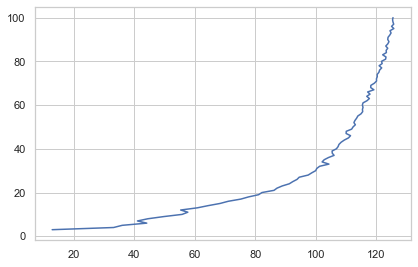

In [39]:
plt.plot(df['UMass coherence'], df['n_Topic'])
plt.show()

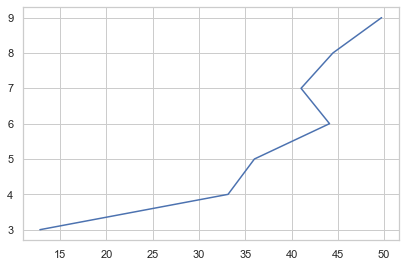

In [40]:
result1 = []
for n_topics in range(3, 10, 1):
    svd = TruncatedSVD(n_components=n_topics, algorithm='randomized', n_iter=10, random_state=42)
    svd.fit(vect_text)
    avg_coherence = get_average_topic_coherence(vect_text, svd.components_, 10)
    result1.append([n_topics,avg_coherence*(-1)])

df = pd.DataFrame(result1)
df.columns = ['n_Topic', 'UMass coherence']
plt.plot(df['UMass coherence'], df['n_Topic'])
plt.show()

# Latent Dirichlet Allocation (LDA)
LDA is the most popular technique.The topics then generate words based on their probability distribution. Given a dataset of documents, LDA backtracks and tries to figure out what topics would create those documents in the first place.

To understand the maths it seems as if knowledge of Dirichlet distribution (distribution of distributions) is required which is quite intricate and left fior now.

In [42]:
from sklearn.decomposition import LatentDirichletAllocation

# n_components is the number of topics
lda_model=LatentDirichletAllocation(n_components=10,learning_method='online',random_state=42,max_iter=1) 

lda_top=lda_model.fit_transform(vect_text)
print(lda_top.shape)  # (no_of_doc,no_of_topics)
print(lda_top)

(12452, 10)
[[0.02008967 0.02009114 0.02009019 ... 0.0200902  0.02009726 0.02008972]
 [0.03458588 0.03458884 0.03458603 ... 0.03458696 0.68871829 0.03458658]
 [0.12332434 0.02594352 0.02594305 ... 0.02594931 0.02595734 0.02595048]
 ...
 [0.02501125 0.02501178 0.02501204 ... 0.11874587 0.23075977 0.02501128]
 [0.02664984 0.15220453 0.0266499  ... 0.02666184 0.15245344 0.02666296]
 [0.03537614 0.03537069 0.03536922 ... 0.03536994 0.03536994 0.26016934]]


In [43]:
# composition of doc 0 for eg
print("Document 0: ")
for i,topic in enumerate(lda_top[0]):
  print("Topic ",i,": ",topic*100,"%")

Document 0: 
Topic  0 :  2.0089673536957995 %
Topic  1 :  2.0091141407379656 %
Topic  2 :  2.0090187301484876 %
Topic  3 :  2.008965774909963 %
Topic  4 :  81.91822967753309 %
Topic  5 :  2.0089670127369508 %
Topic  6 :  2.0090195870913226 %
Topic  7 :  2.0090195139480507 %
Topic  8 :  2.0097258052415095 %
Topic  9 :  2.008972403956863 %


In [45]:
# most important 10 words for each topic
vocab = vect.get_feature_names()
for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
died start americans since killed worldwide states people pandemic rates 

Topic 1: 
analytics covid data latest county publichealth using insights datascience team 

Topic 2: 
world visit next biden forget great response covid already real 

Topic 3: 
use emergency news management tests flow turn expand intention lateral 

Topic 4: 
covid health people need pandemic new risk time years pm 

Topic 5: 
tests global thats right cost pandemic additional price commit rather 

Topic 6: 
covid like ukraine russia going ukrainerussianwar war russianukrainianwar end virus 

Topic 7: 
covid vaccine masks would propaganda get still work vaccines home 

Topic 8: 
cases covid new daily coronavirus deaths total rate active update 

Topic 9: 
administered doses vaccine covid vaccinated check find available putin vaccination 



# Determining Optimal Number of Topics

3 -101.33531327237101
4 -68.96242987422602
5 -73.03476810308051
6 -100.08498500142495
7 -91.10145427170103
8 -92.97586441298218
9 -105.02461738077285
10 -97.26552044513093
11 -112.73217183953156
12 -107.95652578585491
13 -91.11200534837667
14 -102.87931638027783
15 -103.78740656288404
16 -94.30933414723359
17 -109.82796310033493
18 -113.11292459790536
19 -106.35061445234089
20 -114.33546412732906
21 -100.51653599150147
22 -104.03667902733869
23 -114.20117042634779
24 -117.94363329173227
25 -115.41214120003048
26 -111.70732159217462
27 -106.64263401594773
28 -112.814079015498
29 -111.42280286983778
30 -106.38578136502635
31 -105.04477037059742
32 -110.50657055406344
33 -113.57563629024506
34 -102.5545422277169
35 -105.67971144351802
36 -107.1879333243664
37 -104.94449845138654
38 -106.45222727388024
39 -107.217431681344
40 -106.70531850807147
41 -100.7581467509347
42 -105.14689664233022
43 -97.18282062926703
44 -101.89414470819328
45 -105.25925135099864
46 -100.1225106848866
47 -107.057

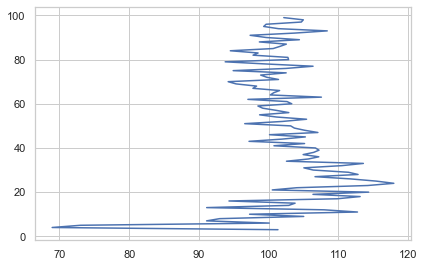

In [48]:
result_lda = []
for n_topics in range(3, 100, 1):
    svd = LatentDirichletAllocation(n_components=n_topics,learning_method='online',random_state=42,max_iter=1)
    svd.fit(vect_text)
    avg_coherence = get_average_topic_coherence(vect_text, svd.components_, 10)
    result_lda.append([n_topics,avg_coherence*(-1)])
    print(str(n_topics) + " " + str(avg_coherence))

df = pd.DataFrame(result_lda)
df.columns = ['n_Topic', 'UMass coherence']
plt.plot(df['UMass coherence'], df['n_Topic'])
plt.show()

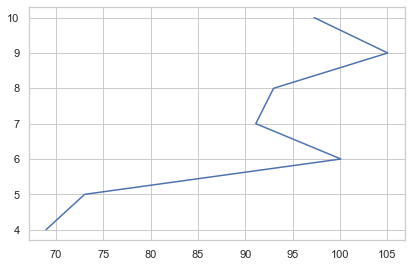

In [50]:
result_lda1 = []
for n_topics in range(4, 11 , 1):
    svd = LatentDirichletAllocation(n_components=n_topics,learning_method='online',random_state=42,max_iter=1)
    svd.fit(vect_text)
    avg_coherence = get_average_topic_coherence(vect_text, svd.components_, 10)
    result_lda1.append([n_topics,avg_coherence*(-1)])

df = pd.DataFrame(result_lda1)
df.columns = ['n_Topic', 'UMass coherence']
plt.plot(df['UMass coherence'], df['n_Topic'])
plt.show()

# Word Cloud by Topic in LDA

To better visualize words in a topic we can see the word cloud. For each topic top 50 words are plotted.

In [30]:
from wordcloud import WordCloud
# Generate a word cloud image for given topic
def draw_word_cloud(index):
  imp_words_topic=""
  comp=lda_model.components_[index]
  vocab_comp = zip(vocab, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:50]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]

  wordcloud = WordCloud(width=1600,height=800,max_font_size=200,max_words=200,collocations=False, background_color='white').generate(imp_words_topic)
  plt.figure( figsize=(40,30))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()
 

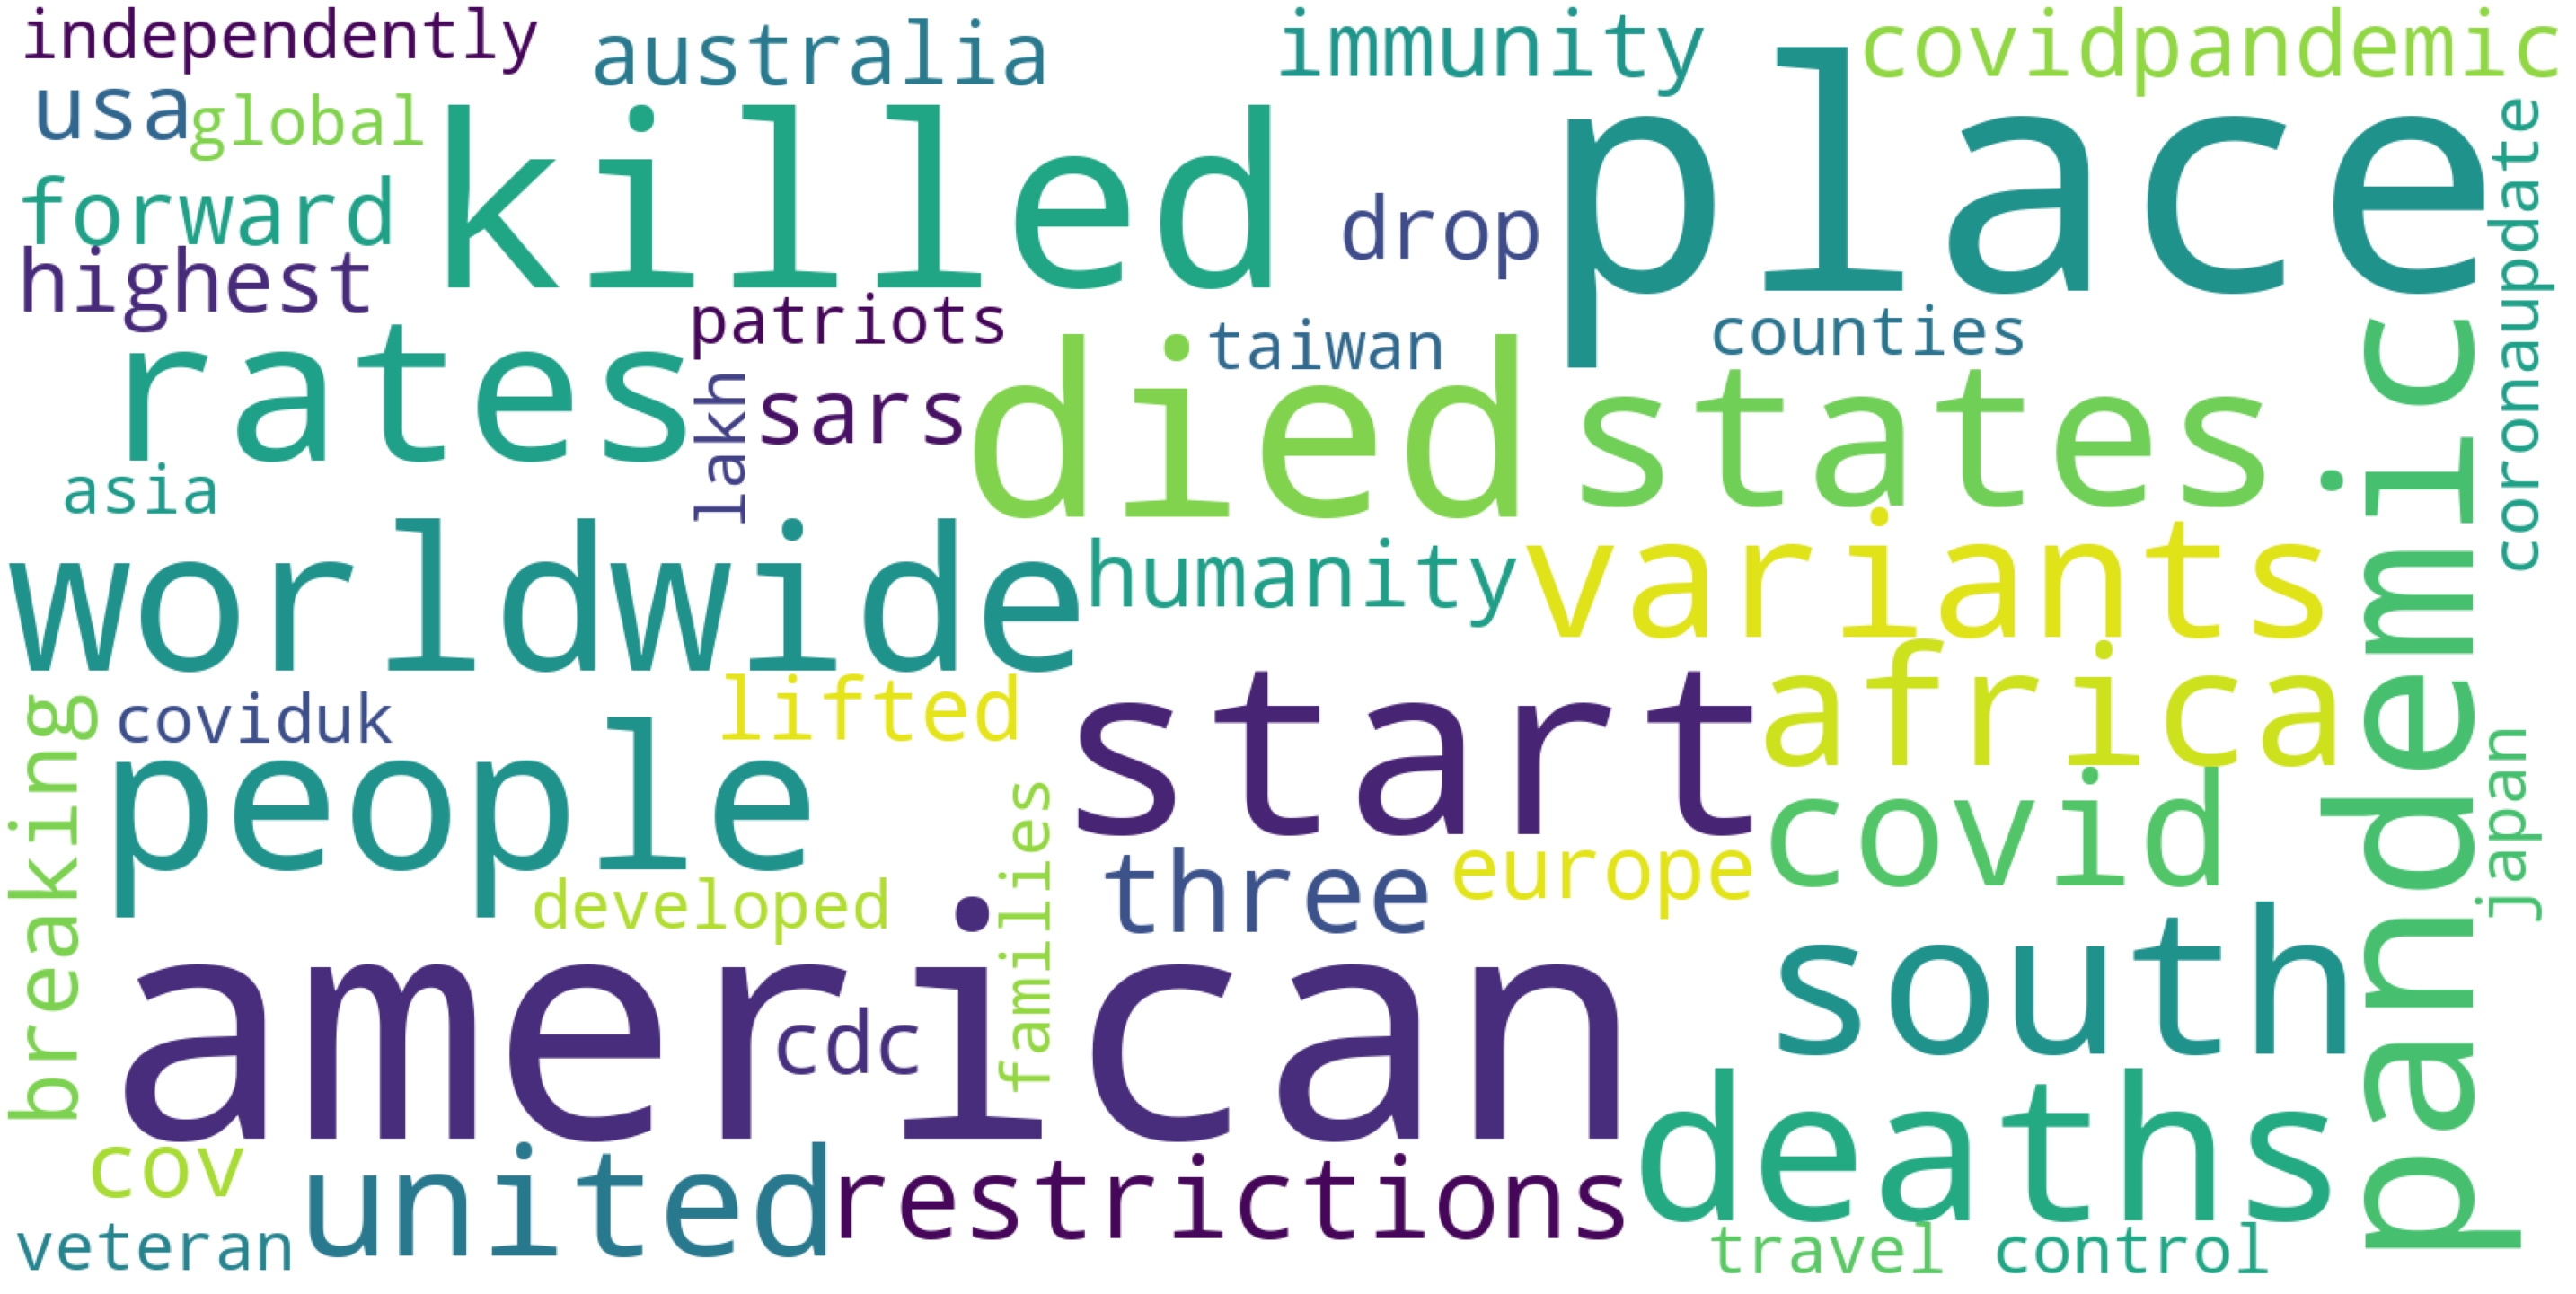

In [31]:
draw_word_cloud(0)

# Word Cloud by Topic in LSA


To better visualize words in a topic we can see the word cloud. For each topic top 50 words are plotted.

In [26]:
def draw_word_cloud(index):
  imp_words_topic1=""
  comp1=lsa_model.components_[index]
  vocab_comp1 = zip(vocab, comp1)
  sorted_words1 = sorted(vocab_comp1, key= lambda x:x[1], reverse=True)[:50]
  for word in sorted_words1:
    imp_words_topic1=imp_words_topic1+" "+word[0]

  wordcloud1 = WordCloud(width=1600,height=800,max_font_size=200,max_words=200,collocations=False, background_color='white').generate(imp_words_topic1)
  plt.figure( figsize=(40,30))
  plt.imshow(wordcloud1)
  plt.axis("off")
  plt.tight_layout()
  plt.show()
 

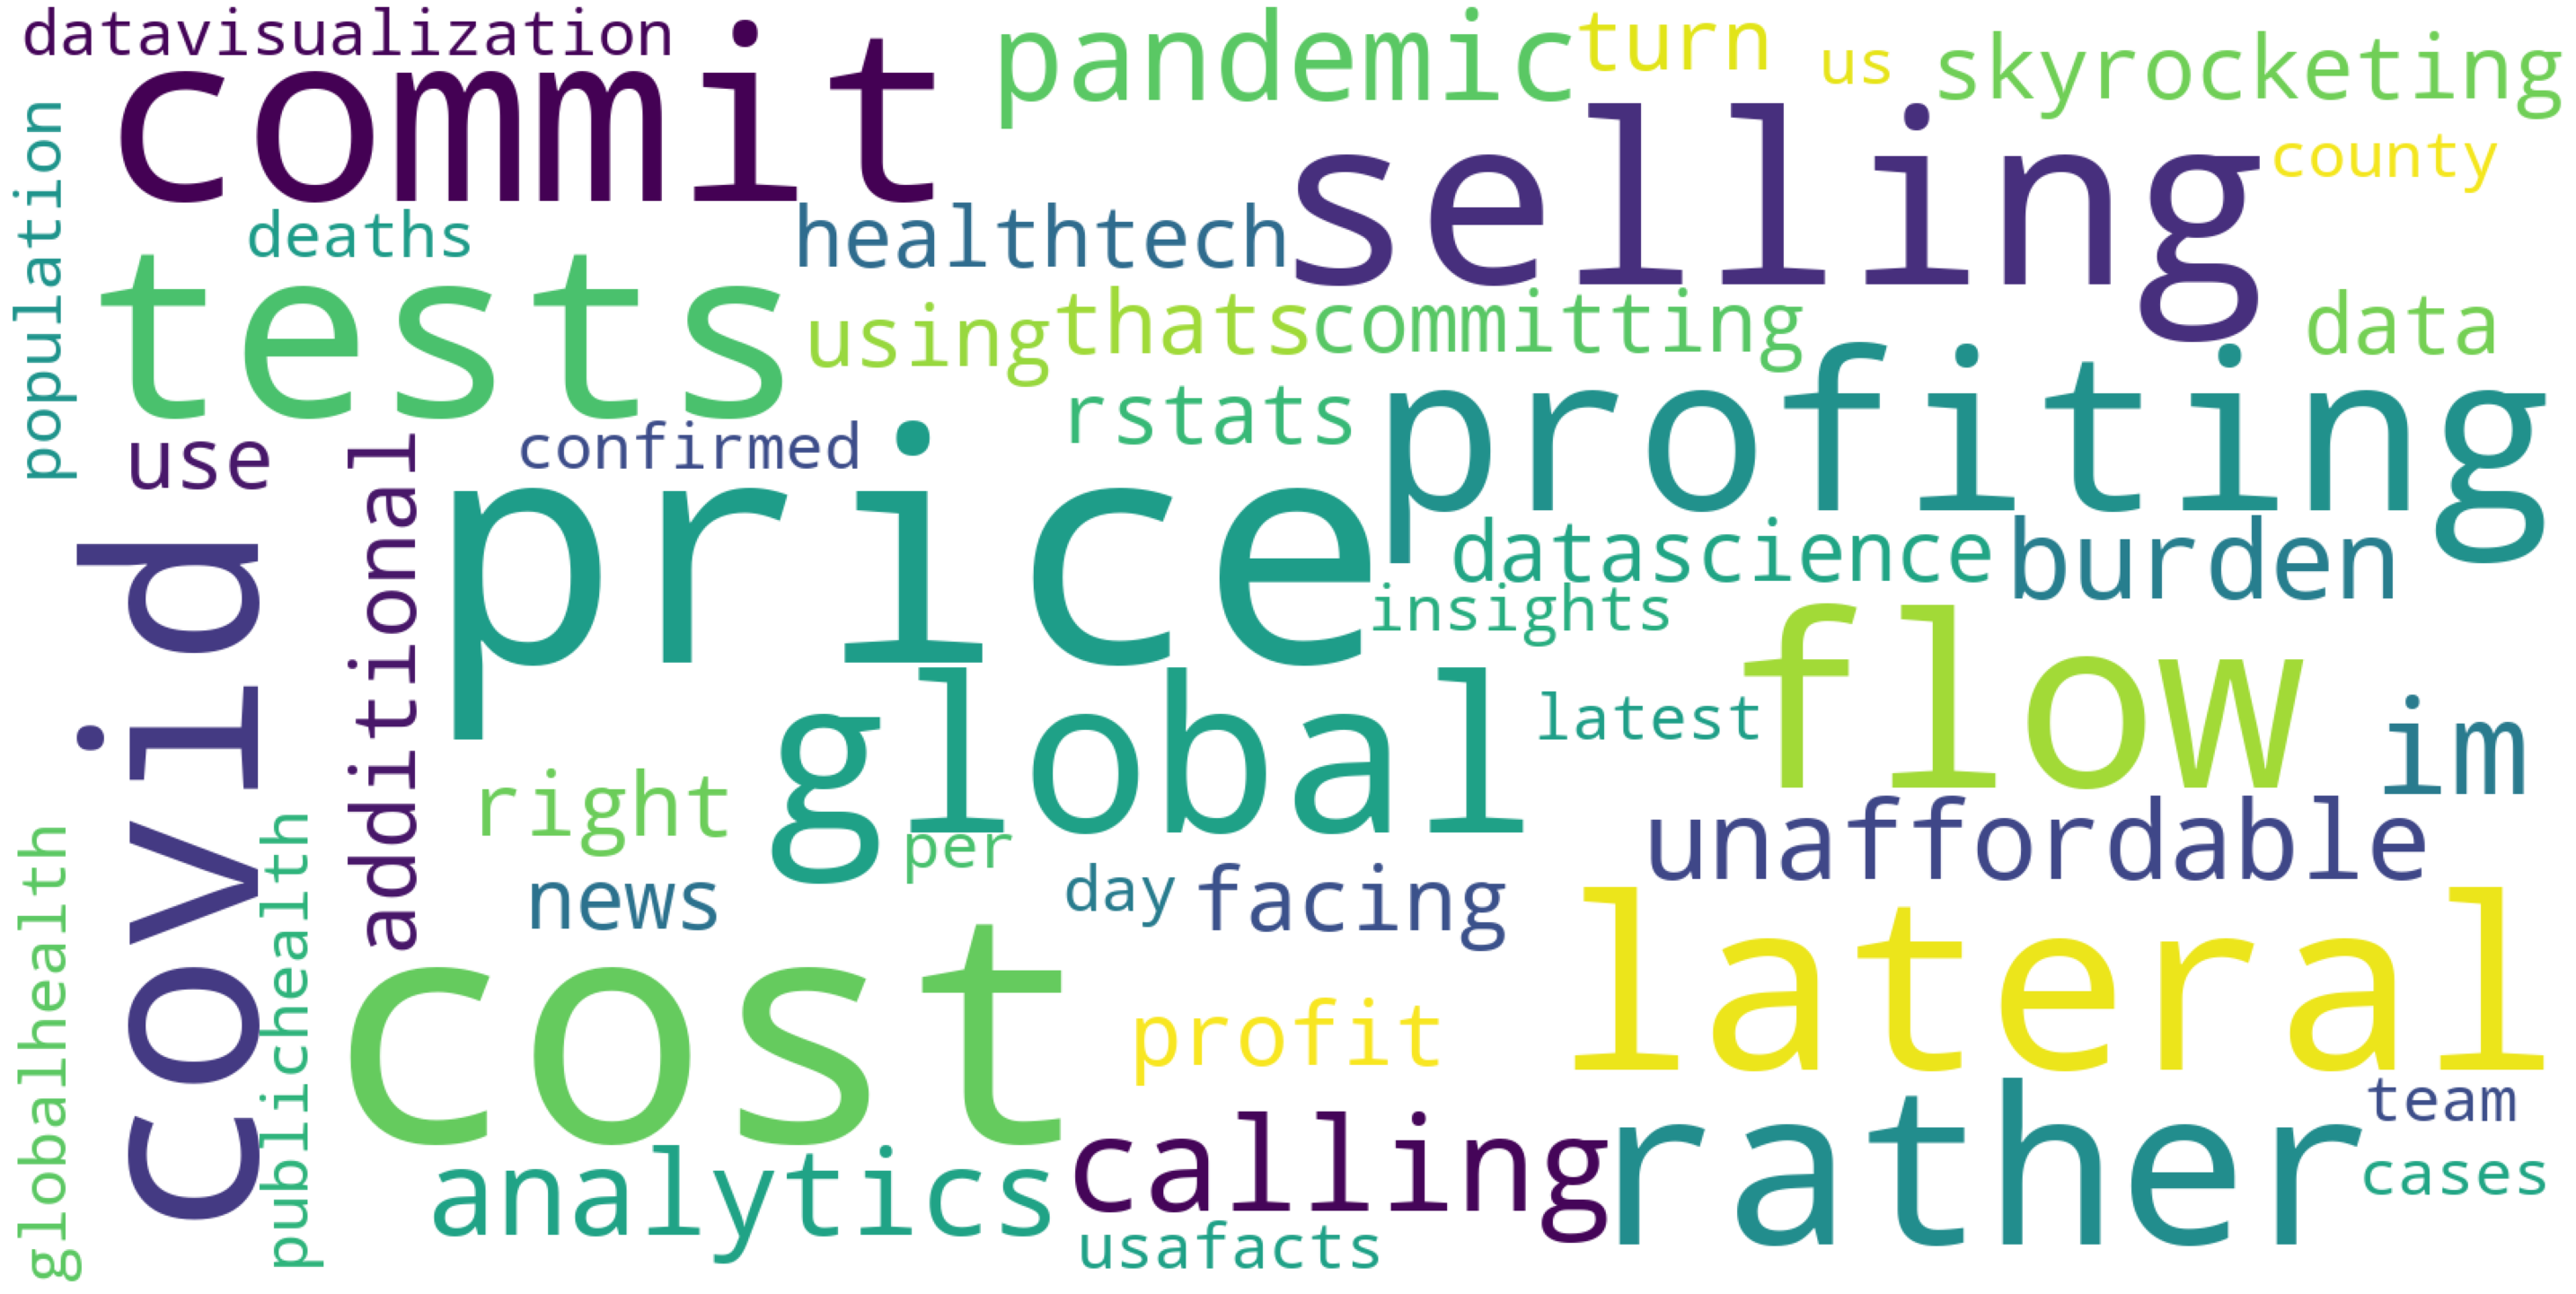

In [27]:
draw_word_cloud(0)